# Carga archivos

In [ ]:
import pickle
import numpy as np
from tqdm import tqdm
import pandas as pd

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1-01jDt6eGboCV5ZidWMKiN71cKFUD6X3"})   
downloaded.GetContentFile('sparseImages') 

downloaded = drive.CreateFile({'id':"1-3pzoQCAspxGnOiFBGQTHg_wxx9Eu9VU"})   
downloaded.GetContentFile('labels')

In [ ]:
with open('sparseImages', 'rb') as f:
    images = pickle.load(f)

In [ ]:
with open('labels', 'rb') as f:
    labels = pickle.load(f)

In [ ]:
len(labels)

100000

In [ ]:
pd.DataFrame(labels).value_counts()

potato        17140
banana        16126
apple          8009
grapes         7653
asparagus      7612
broccoli       6862
onion          6692
pineapple      6626
watermelon     6368
blueberry      6045
blackberry     5580
strawberry     5287
dtype: int64

In [ ]:
images = images.todense()

In [ ]:
x_train = images[:int(0.80*len(images))]
y_train = labels[:int(0.80*len(images))]

x_valid = images[int(0.80*len(images)):int(0.90*len(images))]
y_valid = labels[int(0.80*len(images)):int(0.90*len(images))]

x_test = images[int(0.90*len(images)):]
y_test = labels[int(0.90*len(images)):]

In [ ]:
len(x_train), len(x_valid), len(x_test)

(80000, 10000, 10000)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from numpy.linalg import svd
from matplotlib.pyplot import imshow

In [ ]:
x_train.shape # cada FILA representa una imagen

(80000, 4096)

In [ ]:
y_train.shape

(80000,)

In [ ]:
train_copy = x_train.copy()
valid_copy = x_valid.copy()

# Busqueda de hiperparametros


In [ ]:
from sklearn.pipeline import Pipeline
import random
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import top_k_accuracy_score

In [ ]:
svd = TruncatedSVD(random_state=42)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
search_space_svd = {
    "n_components": [10,15,20,22,30],
    "algorithm" : ["arpack", "randomized"],
    
}

In [ ]:
search_space_knn = {
    "n_neighbors" : [10,15,20,25,40],
    "p": [1,2],
    "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
}


In [ ]:
best_estimators = {}
for i in tqdm(range(5)):
    nComponents = random.choice(search_space_svd["n_components"])
    alg = random.choice(search_space_svd["algorithm"])
    svd = TruncatedSVD(random_state=42, n_components = nComponents, algorithm = alg)
    x_train = svd.fit_transform(x_train)
    # 5 corridas x 2 RS = 10 combinaciones
    print("HP SVD: \nn_components : {}\nalgorithm: {}".format(nComponents, alg))
    rs = RandomizedSearchCV(estimator=knn,
                            param_distributions = search_space_knn,
                            scoring = "accuracy",
                            n_jobs=1,
                            n_iter = 2,
                            verbose=3)
    rs.fit(x_train, y_train)
    k = rs.best_params_
    k["n_components"] = nComponents
    k["svd_algorith"] = alg

    best_estimators[rs.best_score_] = k
    x_train = train_copy

  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


HP SVD: 
n_components : 22
algorithm: randomized
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END algorithm=kd_tree, n_neighbors=25, p=2;, score=0.722 total time=  48.3s
[CV 2/5] END algorithm=kd_tree, n_neighbors=25, p=2;, score=0.731 total time=  51.4s
[CV 3/5] END algorithm=kd_tree, n_neighbors=25, p=2;, score=0.723 total time=  56.9s
[CV 4/5] END algorithm=kd_tree, n_neighbors=25, p=2;, score=0.727 total time=  51.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=25, p=2;, score=0.723 total time=  52.4s
[CV 1/5] END algorithm=kd_tree, n_neighbors=20, p=2;, score=0.725 total time=  48.1s
[CV 2/5] END algorithm=kd_tree, n_neighbors=20, p=2;, score=0.732 total time=  50.2s
[CV 3/5] END algorithm=kd_tree, n_neighbors=20, p=2;, score=0.725 total time=  49.6s
[CV 4/5] END algorithm=kd_tree, n_neighbors=20, p=2;, score=0.730 total time=  51.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=20, p=2;, score=0.724 total time= 1.0min


 20%|██        | 1/5 [09:13<36:52, 553.10s/it]/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


HP SVD: 
n_components : 15
algorithm: arpack
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END algorithm=ball_tree, n_neighbors=40, p=1;, score=0.706 total time= 1.2min
[CV 2/5] END algorithm=ball_tree, n_neighbors=40, p=1;, score=0.711 total time= 1.2min
[CV 3/5] END algorithm=ball_tree, n_neighbors=40, p=1;, score=0.703 total time= 1.1min
[CV 4/5] END algorithm=ball_tree, n_neighbors=40, p=1;, score=0.706 total time= 1.2min
[CV 5/5] END algorithm=ball_tree, n_neighbors=40, p=1;, score=0.704 total time= 1.2min
[CV 1/5] END algorithm=brute, n_neighbors=20, p=1;, score=0.714 total time=  26.6s
[CV 2/5] END algorithm=brute, n_neighbors=20, p=1;, score=0.716 total time=  26.5s
[CV 3/5] END algorithm=brute, n_neighbors=20, p=1;, score=0.710 total time=  25.5s
[CV 4/5] END algorithm=brute, n_neighbors=20, p=1;, score=0.713 total time=  23.5s


 40%|████      | 2/5 [17:52<26:39, 533.22s/it]

[CV 5/5] END algorithm=brute, n_neighbors=20, p=1;, score=0.710 total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


HP SVD: 
n_components : 20
algorithm: randomized
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END algorithm=kd_tree, n_neighbors=25, p=1;, score=0.719 total time= 1.7min
[CV 2/5] END algorithm=kd_tree, n_neighbors=25, p=1;, score=0.724 total time= 1.8min
[CV 3/5] END algorithm=kd_tree, n_neighbors=25, p=1;, score=0.713 total time= 1.8min
[CV 4/5] END algorithm=kd_tree, n_neighbors=25, p=1;, score=0.719 total time= 1.7min
[CV 5/5] END algorithm=kd_tree, n_neighbors=25, p=1;, score=0.715 total time= 1.6min
[CV 1/5] END algorithm=ball_tree, n_neighbors=10, p=1;, score=0.721 total time= 1.7min
[CV 2/5] END algorithm=ball_tree, n_neighbors=10, p=1;, score=0.723 total time= 1.7min
[CV 3/5] END algorithm=ball_tree, n_neighbors=10, p=1;, score=0.717 total time= 1.6min
[CV 4/5] END algorithm=ball_tree, n_neighbors=10, p=1;, score=0.721 total time= 1.6min
[CV 5/5] END algorithm=ball_tree, n_neighbors=10, p=1;, score=0.718 total time= 1.5min


 60%|██████    | 3/5 [35:05<25:22, 761.46s/it]/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


HP SVD: 
n_components : 22
algorithm: arpack
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END algorithm=ball_tree, n_neighbors=40, p=2;, score=0.717 total time= 1.9min
[CV 2/5] END algorithm=ball_tree, n_neighbors=40, p=2;, score=0.724 total time= 1.9min
[CV 3/5] END algorithm=ball_tree, n_neighbors=40, p=2;, score=0.714 total time= 2.0min
[CV 4/5] END algorithm=ball_tree, n_neighbors=40, p=2;, score=0.720 total time= 2.0min
[CV 5/5] END algorithm=ball_tree, n_neighbors=40, p=2;, score=0.716 total time= 1.9min
[CV 1/5] END algorithm=ball_tree, n_neighbors=20, p=2;, score=0.726 total time= 1.9min
[CV 2/5] END algorithm=ball_tree, n_neighbors=20, p=2;, score=0.731 total time= 1.8min
[CV 3/5] END algorithm=ball_tree, n_neighbors=20, p=2;, score=0.723 total time= 1.8min
[CV 4/5] END algorithm=ball_tree, n_neighbors=20, p=2;, score=0.729 total time= 1.9min
[CV 5/5] END algorithm=ball_tree, n_neighbors=20, p=2;, score=0.723 total time= 1.9min


 80%|████████  | 4/5 [54:51<15:29, 929.07s/it]/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


HP SVD: 
n_components : 30
algorithm: randomized
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END algorithm=auto, n_neighbors=20, p=1;, score=0.710 total time=  49.3s
[CV 2/5] END algorithm=auto, n_neighbors=20, p=1;, score=0.717 total time=  48.8s
[CV 3/5] END algorithm=auto, n_neighbors=20, p=1;, score=0.710 total time=  46.5s
[CV 4/5] END algorithm=auto, n_neighbors=20, p=1;, score=0.716 total time=  45.3s
[CV 5/5] END algorithm=auto, n_neighbors=20, p=1;, score=0.711 total time=  44.9s
[CV 1/5] END algorithm=kd_tree, n_neighbors=40, p=1;, score=0.703 total time= 3.2min
[CV 2/5] END algorithm=kd_tree, n_neighbors=40, p=1;, score=0.709 total time= 3.0min
[CV 3/5] END algorithm=kd_tree, n_neighbors=40, p=1;, score=0.697 total time= 3.0min
[CV 4/5] END algorithm=kd_tree, n_neighbors=40, p=1;, score=0.703 total time= 2.8min


100%|██████████| 5/5 [1:14:06<00:00, 889.37s/it] 

[CV 5/5] END algorithm=kd_tree, n_neighbors=40, p=1;, score=0.700 total time= 2.9min


In [ ]:
bestHP = best_estimators[max(best_estimators.keys())]

In [ ]:
bestHP

{'algorithm': 'kd_tree',
 'n_components': 22,
 'n_neighbors': 20,
 'p': 2,
 'svd_algorith': 'randomized'}

Me quedo con el mejor modelo y analizo su top-3 en todo el dataset

In [ ]:
finalSVD = TruncatedSVD(n_components=bestHP["n_components"], algorithm=bestHP["svd_algorith"])
x_train = finalSVD.fit_transform(x_train)
x_valid = finalSVD.transform(x_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
len(x_train)

80000

In [ ]:
finalModel = KNeighborsClassifier(n_neighbors = bestHP["n_neighbors"], algorithm=bestHP["algorithm"], p=bestHP["p"] )

In [ ]:
finalModel.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=20)

In [ ]:
preds = finalModel.predict_proba(x_valid)

In [ ]:
top_k_accuracy_score(y_true = y_valid , y_score = preds, k=3)

0.9116

# Conclusiones

In [ ]:
foods = ["apple","asparagus","banana","blackberry","blueberry","broccoli","grapes","onion","pineapple","potato","strawberry","watermelon"]

In [ ]:
import heapq

def obtenerTop3Index(lista,foods):
  d = [] 
  max_3 = heapq.nlargest(3, lista)
  print(max_3)
  index_1 = lista.index(max_3[0])
  index_2 = lista.index(max_3[1])
  index_3 = lista.index(max_3[2])
  
  if max_3[1] == 0:
    segundo = ("-", max_3[1])
  else:
    segundo = (foods[index_2], max_3[1])
  

  if max_3[2] == 0:
    tercero = ("-", max_3[2])
  else:
    tercero = (foods[index_3], max_3[2])
  return [(foods[index_1], max_3[0]), segundo, tercero ]
  
  

In [ ]:
preds = [list(r) for r in preds]

top3 = []
for p in tqdm(preds):
  top3.append(obtenerTop3Index(p, foods))

In [ ]:
top3[1]

[('asparagus', 0.95), ('grapes', 0.05), ('-', 0.0)]

In [ ]:
r1 = random.randrange(0,len(preds))
r2 = random.randrange(0,len(preds))
r3 = random.randrange(0,len(preds))
r4 = random.randrange(0,len(preds))
r5 = random.randrange(0,len(preds))
r6 = random.randrange(0,len(preds))
r7 = random.randrange(0,len(preds))
r8 = random.randrange(0,len(preds))
r9 = random.randrange(0,len(preds))


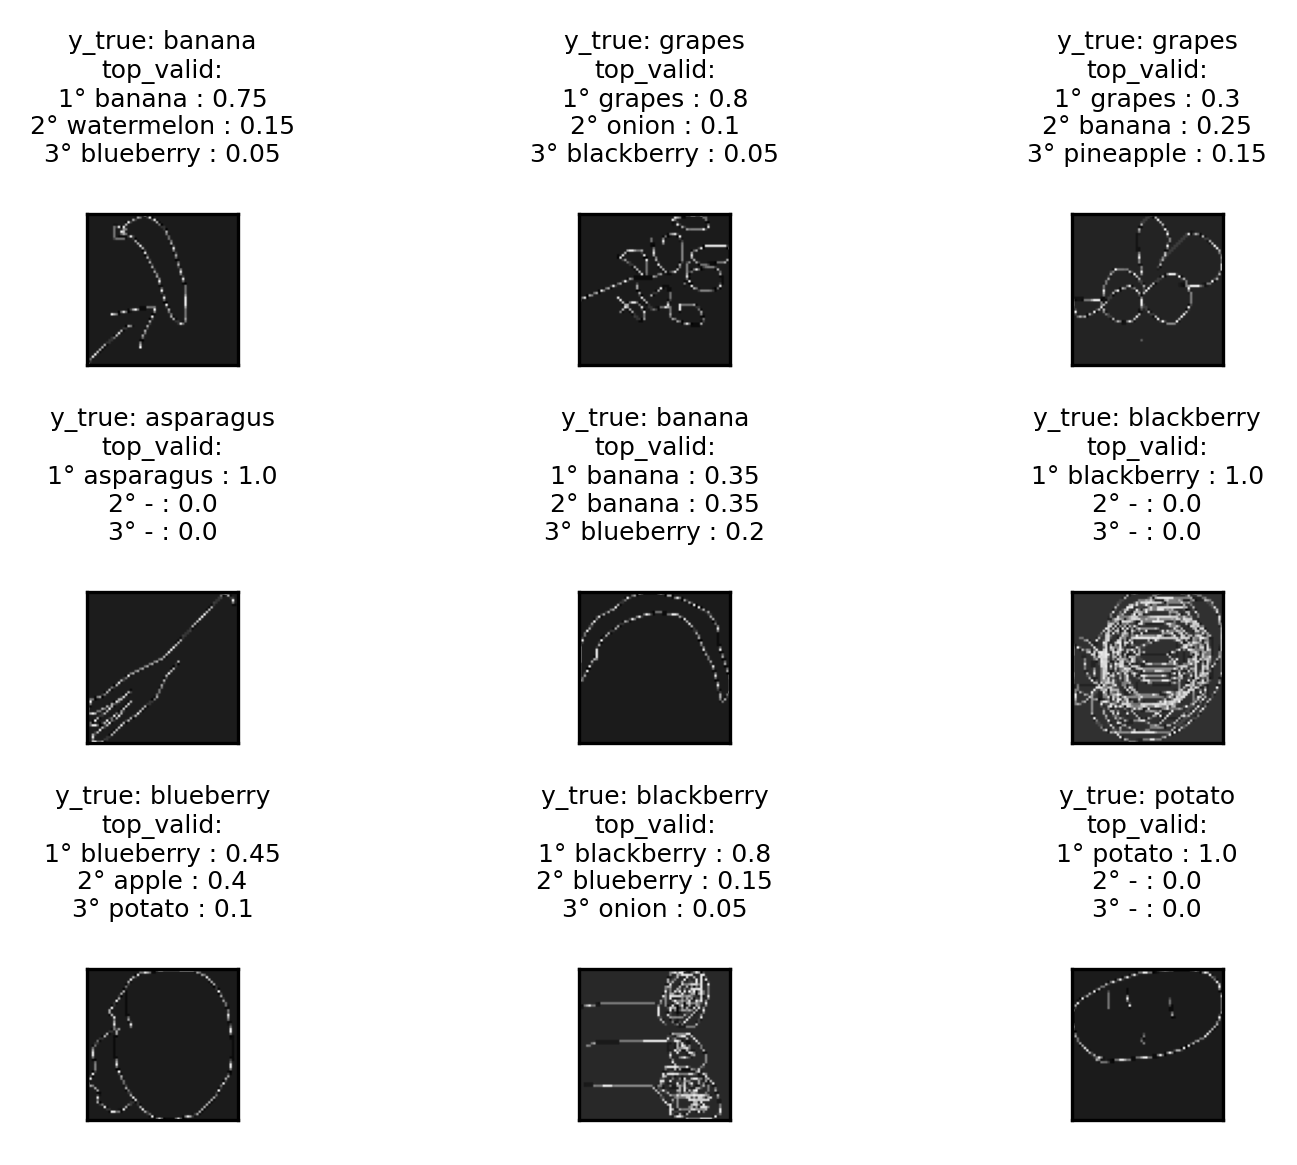

In [ ]:
from IPython.core.pylabtools import figsize
from numpy.core.fromnumeric import size
import matplotlib.pyplot as plt

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 3, dpi=300)

axis[0,0].imshow(valid_copy[r1].reshape((64,64)), cmap="gray")
axis[0, 0].set_title("y_true: {}\ntop_valid:\n1° {} : {}\n2° {} : {}\n3° {} : {}\n".format(y_valid[r1], top3[r1][0][0], top3[r1][0][1], top3[r1][1][0], top3[r1][1][1], top3[r1][2][0], top3[r1][2][1]), fontsize=6)
axis[0,0].set_xticks([]) 
axis[0,0].set_yticks([])

axis[0,1].imshow(valid_copy[r2].reshape((64,64)), cmap="gray")
axis[0,1].set_title("y_true: {}\ntop_valid:\n1° {} : {}\n2° {} : {}\n3° {} : {}\n".format(y_valid[r2], top3[r2][0][0], top3[r2][0][1], top3[r2][1][0], top3[r2][1][1], top3[r2][2][0], top3[r2][2][1]), fontsize=6)
axis[0,1].set_xticks([]) 
axis[0,1].set_yticks([])

axis[0,2].imshow(valid_copy[r3].reshape((64,64)), cmap="gray")
axis[0,2].set_title("y_true: {}\ntop_valid:\n1° {} : {}\n2° {} : {}\n3° {} : {}\n".format(y_valid[r3], top3[r3][0][0], top3[r3][0][1], top3[r3][1][0], top3[r3][1][1], top3[r3][2][0], top3[r3][2][1]), fontsize=6)
axis[0,2].set_xticks([]) 
axis[0,2].set_yticks([])


axis[1,0].imshow(valid_copy[r4].reshape((64,64)), cmap="gray")
axis[1,0].set_title("y_true: {}\ntop_valid:\n1° {} : {}\n2° {} : {}\n3° {} : {}\n".format(y_valid[r4], top3[r4][0][0], top3[r4][0][1], top3[r4][1][0], top3[r4][1][1], top3[r4][2][0], top3[r4][2][1]), fontsize=6)
axis[1,0].set_xticks([]) 
axis[1,0].set_yticks([])


axis[1,1].imshow(valid_copy[r5].reshape((64,64)), cmap="gray")
axis[1, 1].set_title("y_true: {}\ntop_valid:\n1° {} : {}\n2° {} : {}\n3° {} : {}\n".format(y_valid[r5], top3[r5][0][0], top3[r5][0][1], top3[r5][1][0], top3[r5][1][1], top3[r5][2][0], top3[r5][2][1]), fontsize=6)
axis[1,1].set_xticks([]) 
axis[1,1].set_yticks([])


axis[1,2].imshow(valid_copy[r6].reshape((64,64)), cmap="gray")
axis[1,2].set_title("y_true: {}\ntop_valid:\n1° {} : {}\n2° {} : {}\n3° {} : {}\n".format(y_valid[r6], top3[r6][0][0], top3[r6][0][1], top3[r6][1][0], top3[r6][1][1], top3[r6][2][0], top3[r6][2][1]), fontsize=6)
axis[1,2].set_xticks([]) 
axis[1,2].set_yticks([])


axis[2,0].imshow(valid_copy[r7].reshape((64,64)), cmap="gray")
axis[2,0].set_title("y_true: {}\ntop_valid:\n1° {} : {}\n2° {} : {}\n3° {} : {}\n".format(y_valid[r7], top3[r7][0][0], top3[r7][0][1], top3[r7][1][0], top3[r7][1][1], top3[r7][2][0], top3[r7][2][1]), fontsize=6)
axis[2,0].set_xticks([]) 
axis[2,0].set_yticks([])


axis[2,1].imshow(valid_copy[r8].reshape((64,64)), cmap="gray")
axis[2,1].set_title("y_true: {}\ntop_valid:\n1° {} : {}\n2° {} : {}\n3° {} : {}\n".format(y_valid[r8], top3[r8][0][0], top3[r8][0][1], top3[r8][1][0], top3[r8][1][1], top3[r8][2][0], top3[r8][2][1]), fontsize=6)
axis[2,1].set_xticks([]) 
axis[2,1].set_yticks([])


axis[2,2].imshow(valid_copy[r9].reshape((64,64)), cmap="gray")
axis[2,2].set_title("y_true: {}\ntop_valid:\n1° {} : {}\n2° {} : {}\n3° {} : {}\n".format(y_valid[r9], top3[r9][0][0], top3[r9][0][1], top3[r9][1][0], top3[r9][1][1], top3[r9][2][0], top3[r9][2][1]), fontsize=6)
axis[2,2].set_xticks([]) 
axis[2,2].set_yticks([])


plt.subplots_adjust(hspace = 1.5)
plt.show()
